In [3]:
import pandas as pd

# Load the uploaded files
test_df = pd.read_parquet("test-00000-of-00001.parquet")
train_df_1 = pd.read_parquet("train-00000-of-00002.parquet")
train_df_2 = pd.read_parquet("train-00001-of-00002.parquet")

# Combine all datasets into one
df = pd.concat([test_df, train_df_1, train_df_2])

# Show dataset info
print(df.info())

# Display first 5 rows
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14795 entries, 0 to 5933
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   audio   14795 non-null  object
 1   text    14795 non-null  object
dtypes: object(2)
memory usage: 346.8+ KB
None


,audio,text
0,{'bytes': b'RIFF\x84\xc2\x00\x00WAVEfmt \x10\x...,german wing seven papa ruzyne tower hello agai...
1,{'bytes': b'RIFF\xa4\xb1\x00\x00WAVEfmt \x10\x...,climb flight level one six zero emirates one f...
2,{'bytes': b'RIFFd\xec\x00\x00WAVEfmt \x10\x00\...,singapoore three two five request flight level...
3,{'bytes': b'RIFF\xc4\xaa\x00\x00WAVEfmt \x10\x...,to actualy it will be runway two two
4,{'bytes': b'RIFFD\xe3\x01\x00WAVEfmt \x10\x00\...,praha radar oscar kilo k uniform november dire...


# <span style="color:black">Clean the Data</span>


In [4]:
# Keep only the text column
df = df[['text']]

# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Remove special characters, numbers, and extra spaces
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['text'] = df['text'].str.strip()

# Show cleaned data
df.head()


,text
0,german wing seven papa ruzyne tower hello agai...
1,climb flight level one six zero emirates one f...
2,singapoore three two five request flight level...
3,to actualy it will be runway two two
4,praha radar oscar kilo k uniform november dire...


In [5]:
df.to_csv("cleaned_atc_text.csv", index=False)


In [6]:
from IPython.display import FileLink

FileLink("cleaned_atc_text.csv")


/Users/dharshusivakumar/cleaned_atc_text.csv

# <span style="color:black">Load the Cleaned Data</span>


In [7]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_atc_text.csv")

# Display first few rows
df.head()

,text
0,german wing seven papa ruzyne tower hello agai...
1,climb flight level one six zero emirates one f...
2,singapoore three two five request flight level...
3,to actualy it will be runway two two
4,praha radar oscar kilo k uniform november dire...


In [8]:
from collections import Counter

# Combine all text into one large string
all_text = " ".join(df['text'])

# Split into words
words = all_text.split()

# Count word frequency
word_counts = Counter(words)

# Show the 20 most common words
word_counts.most_common(20)


[('one', 12702),
 ('zero', 10147),
 ('three', 9430),
 ('two', 7515),
 ('five', 5738),
 ('four', 4637),
 ('seven', 4176),
 ('nine', 3828),
 ('eight', 3772),
 ('level', 3679),
 ('six', 3270),
 ('flight', 2853),
 ('csa', 2524),
 ('radar', 2239),
 ('contact', 2221),
 ('to', 2215),
 ('praha', 1972),
 ('good', 1772),
 ('runway', 1672),
 ('bye', 1367)]

# <span style="color:black">Word Frequency Analysis</span>


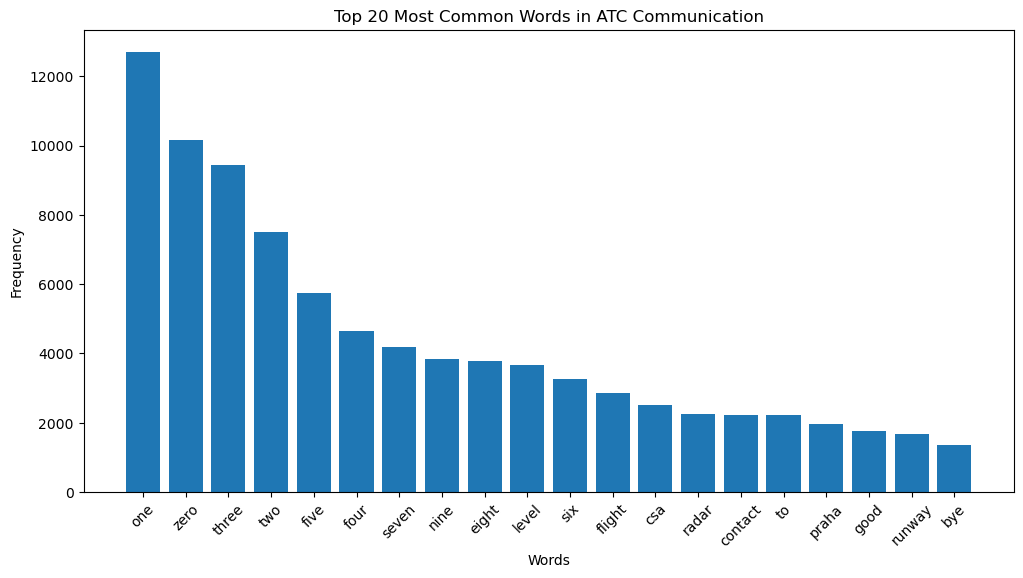

In [9]:
import matplotlib.pyplot as plt

# Convert to DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(12, 6))
plt.bar(common_words_df["Word"], common_words_df["Frequency"])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in ATC Communication")
plt.xticks(rotation=45)
plt.show()

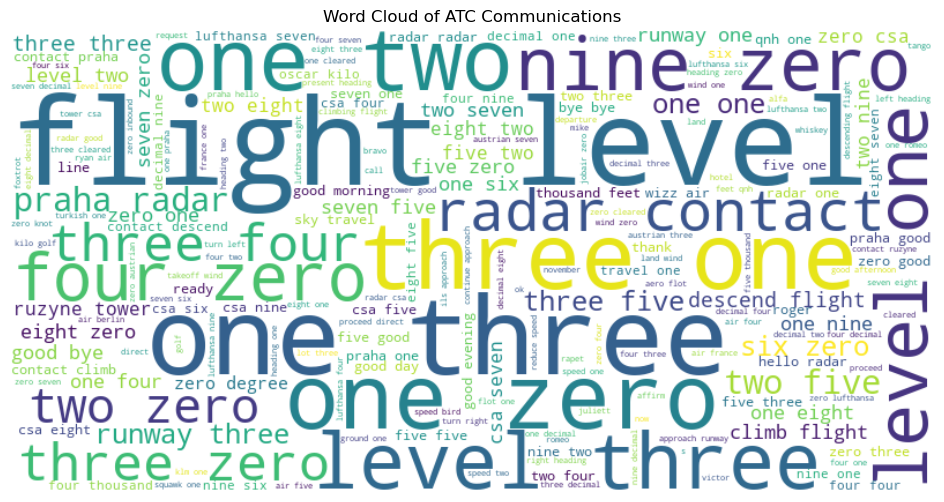

In [10]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of ATC Communications")
plt.show()


# <span style="color:black">Create a Word Cloud</span>

In [11]:
!pip install wordcloud


In [12]:
!conda install -c conda-forge wordcloud -y


done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



# All requested packages already installed.



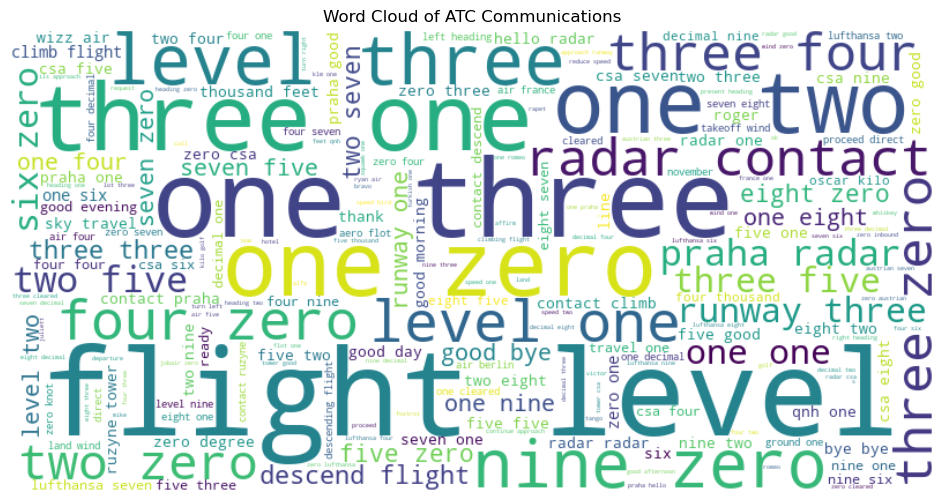

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of ATC Communications")
plt.show()


# <span style="color:black">Identify Risky Communication Patterns</span>



In [14]:
# Find messages with less than 3 words (potentially incomplete)
short_messages = df[df['text'].str.split().str.len() < 3]

# Display short or ambiguous messages
print("Short or ambiguous ATC messages:")
print(short_messages.head(10))

Short or ambiguous ATC messages:
             text
13     expediting
40         descen
43     seven five
90        at base
92      five zero
116       one one
119    baltu four
136  left heading
139        affirm
145    five tango


# <span style="color:black">Find Potential Readback Errors</span>


In [15]:
# Find messages containing "repeat", "say again", or "confirm" (possible miscommunication)
readback_issues = df[df['text'].str.contains("repeat|say again|confirm", case=False, na=False)]

# Display messages where pilots requested clarification
print("Potential readback errors:")
print(readback_issues.head(10))


Potential readback errors:
                                                  text
55   hotel quebec mike i confirm cleared to land ru...
121  ryan air eight zero eight eight confirm reques...
129           say again for startup who wanted star up
382  one two zero two seven five sky travel one zer...
393  lufthansa seven one four hello radar contact c...
422  confirm when localizer established we re estab...
567  just for confirmation lufthansa seven charlie ...
626       confirm one three four nine two five bye bye
630  roger confirm midland seven seven four decimal...
892           good morning can you just confirm expect


# <span style="color:black">Extract Unusual Phrases</span>


In [ ]:
from collections import Counter

# Get all phrases (bigrams - two-word combinations)
bigrams = [tuple(df['text'].str.split().iloc[i][:2]) for i in range(len(df)) if len(df['text'].iloc[i].split()) > 1]

# Count most common bigrams
bigram_counts = Counter(bigrams)

# Show the least common (potentially unusual) phrases
unusual_phrases = [phrase for phrase, count in bigram_counts.items() if count < 3]  # Change threshold if needed

print("Unusual ATC phrases (potential miscommunication):")
print(unusual_phrases[:20])  # Display 20 least common phrases


# Check If Bigrams Were Created

In [ ]:
print("Sample bigrams:", bigrams[:10])


In [ ]:
import pandas as pd

# Reload dataset
df = pd.read_csv("cleaned_atc_text.csv")  

# Check if it's loaded properly
print("Dataset shape:", df.shape)  # Should print (rows, columns)
print("\nColumn names:", df.columns)  # Should list all column names
print("\nSample text data:", df['text'].dropna().head(10).tolist())  # Ensure text exists


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove spaces from column names


In [ ]:
print(df.columns)


In [ ]:
from collections import Counter

# Ensure text column is valid
df = df.dropna()

# Generate bigrams (two-word phrases)
bigrams = [tuple(text.split()[:2]) for text in df['text'] if len(text.split()) > 1]

# Count occurrences
bigram_counts = Counter(bigrams)

# Show sample bigrams
print("Sample bigrams:", list(bigram_counts.items())[:10])


# Convert Audio Data to Text Data

In [ ]:
print(df['audio'].head(5))


In [ ]:
print("Column names in dataset:", df.columns.tolist())


In [ ]:
import pyarrow.parquet as pq

# Check the schema of your Parquet file
parquet_file = pq.ParquetFile("test-00000-of-00001.parquet")
print(parquet_file.schema)


In [ ]:
df = pd.read_parquet("test-00000-of-00001.parquet", engine="pyarrow")

# Check the structure of the 'audio' column
print(df['audio'].head(5))


In [ ]:
import soundfile as sf

# Extract first audio sample (check if 'bytes' exists)
if 'bytes' in df.iloc[0]['audio']:
    audio_data = df.iloc[0]['audio']['bytes']

    # Save as WAV file
    with open("sample_audio.wav", "wb") as f:
        f.write(audio_data)

    print("Sample audio saved as sample_audio.wav")
else:
    print("No raw audio bytes found, check the 'path' column instead.")


In [ ]:
!pip install soundfile


In [ ]:
!conda install -c conda-forge soundfile -y


In [ ]:
import soundfile as sf

# Extract first audio sample (check if 'bytes' exists)
if 'bytes' in df.iloc[0]['audio']:
    audio_data = df.iloc[0]['audio']['bytes']

    # Save as WAV file
    with open("sample_audio.wav", "wb") as f:
        f.write(audio_data)

    print("Sample audio saved as sample_audio.wav")
else:
    print("No raw audio bytes found, check the 'path' column instead.")


In [ ]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("test-00000-of-00001.parquet", engine="pyarrow")

# Check if 'audio' column exists
print(df.columns)
print(df.head(5))


In [ ]:
import soundfile as sf

# Extract first audio sample (check if 'bytes' exists)
if 'bytes' in df.iloc[0]['audio']:
    audio_data = df.iloc[0]['audio']['bytes']

    # Save as WAV file
    with open("sample_audio.wav", "wb") as f:
        f.write(audio_data)

    print("Sample audio saved as sample_audio.wav")
else:
    print("No raw audio bytes found, check the 'path' column instead.")


# Install OpenAI Whisper

In [ ]:
!pip install openai-whisper


In [ ]:
!conda install -c conda-forge whisper -y


In [ ]:
!pip install torch torchaudio


In [ ]:
!brew install ffmpeg --verbose


In [ ]:
!ffmpeg -version


In [ ]:
import whisper

# Load Whisper model
model = whisper.load_model("base")

# Transcribe the saved audio file
result = model.transcribe("sample_audio.wav")
print("Transcribed Text:", result["text"])


In [ ]:
result = model.transcribe("sample_audio.wav", language="en")
print("Transcribed Text:", result["text"])


In [ ]:
model = whisper.load_model("medium")  # Or "large"


In [ ]:
result = model.transcribe("sample_audio.wav", language="en")
print("Transcribed Text:", result["text"])


In [ ]:
import os
import soundfile as sf

# Create a folder to save extracted audio files
os.makedirs("audio_samples", exist_ok=True)

# Extract and save first 5 audio files
for i in range(5):  # Change the range to extract more files
    audio_data = df.iloc[i]['audio']['bytes']
    audio_path = f"audio_samples/sample_{i}.wav"
    
    with open(audio_path, "wb") as f:
        f.write(audio_data)
    
    print(f"Saved: {audio_path}")


In [ ]:
import whisper

# Load Whisper model (choose "base", "medium", or "large" for better accuracy)
model = whisper.load_model("medium")

# Transcribe all saved audio files
for i in range(5):  # Adjust the number based on extracted files
    audio_path = f"audio_samples/sample_{i}.wav"
    result = model.transcribe(audio_path, language="en")
    
    print(f"\nTranscribed Text for {audio_path}:")
    print(result["text"])


In [ ]:
import pandas as pd

# Create a list to store results
transcriptions = []

# Transcribe all saved audio files and store in list
for i in range(5):  # Adjust range based on number of files
    audio_path = f"audio_samples/sample_{i}.wav"
    transcribed_text = model.transcribe(audio_path, language="en")["text"]
    actual_text = df.iloc[i]['text']

    transcriptions.append({"Audio File": audio_path, "Transcribed Text": transcribed_text, "Actual Text": actual_text})

# Convert to DataFrame
transcription_df = pd.DataFrame(transcriptions)

# Save to CSV
transcription_df.to_csv("transcriptions.csv", index=False)

print("✅ Transcriptions saved as transcriptions.csv")


# Loading the Transcribed Data

In [ ]:
import pandas as pd

# Load the transcriptions CSV
transcriptions_df = pd.read_csv("transcriptions.csv")

# Display basic information
print(transcriptions_df.info())

# Show the first few rows
print(transcriptions_df.head())


In [ ]:
# Assuming the original dataset is stored in df
merged_df = df.copy()

# Add the transcriptions column
merged_df["transcribed_text"] = transcriptions_df["text"]

# Show the updated dataset
print(merged_df.head())


In [ ]:
print(transcriptions_df.columns)


# Merging the Text Data with Transcribed Data

In [ ]:
merged_df["transcribed_text"] = transcriptions_df["Transcribed Text"]


# Compare Transcribed vs. Actual Text

In [ ]:
!pip install jiwer


In [ ]:
print(merged_df.columns)


In [ ]:
from jiwer import wer

# Ensure no NaN values in the dataset
merged_df[["text", "transcribed_text"]] = merged_df[["text", "transcribed_text"]].fillna("")

# Function to calculate WER for each row
def calculate_wer(row):
    return wer(row["text"], row["transcribed_text"])  

# Apply WER calculation
merged_df["WER"] = merged_df.apply(calculate_wer, axis=1)

# Display the first few rows with WER
print(merged_df[["text", "transcribed_text", "WER"]].head())

# Compute overall average WER
average_wer = merged_df["WER"].mean()
print(f"Average Word Error Rate (WER): {average_wer:.2f}")


In [ ]:
print(merged_df.isnull().sum())

In [ ]:
import pandas as pd

# Display first few rows of the DataFrame
print(merged_df.head())

# Save the output to a CSV file so you can review it
merged_df.to_csv("WER_Analysis.csv", index=False)
print("WER Analysis saved as WER_Analysis.csv")


In [ ]:
from IPython.display import FileLink
FileLink("WER_Analysis.csv")


# Visualization of WER Results

In [ ]:
!pip install matplotlib seaborn pandas


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(12, 6))

# Plot histogram with KDE for better visibility
sns.histplot(merged_df["WER"], bins=20, kde=True, color="royalblue", alpha=0.7, edgecolor="black")

# Improve labeling and readability
plt.xlabel("Word Error Rate (WER)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Word Error Rates", fontsize=14)

# Adjust limits if needed
plt.xlim(0, 1)  # Ensure WER range is between 0 and 1
plt.ylim(0, merged_df["WER"].value_counts().max() + 50)  # Auto adjust Y-axis

# Add grid lines for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
print(merged_df[['text', 'transcribed_text', 'WER']].head(10))  # See first 10


#errors occured due to too mucherrors while converting audio to text like ""german wing seven papa ruzyne tower hello" → "German links 7 ILHG, roger" (Misinterpretation)
#"singapoore three two five request flight level" → "Singapore 325 request my level 330. Standby." (Partial correctness)
#"climb flight level one six zero emirates" → "Five four, elbow one six zero, MBS one four zero" (Random word insertions)


# Visualize WER by Word Length:

In [ ]:
import matplotlib.pyplot as plt

merged_df['length'] = merged_df['text'].apply(lambda x: len(x.split()))
plt.scatter(merged_df['length'], merged_df['WER'])
plt.xlabel("Length of Sentence")
plt.ylabel("Word Error Rate (WER)")
plt.title("WER vs. Sentence Length")
plt.show()


Key Insights from WER vs. Sentence Length:
High WER (1.0) across all sentence lengths:
A lot of transcriptions have WER = 1.0, meaning they are completely wrong.
This happens even for short sentences, suggesting Whisper struggles with specific words rather than just long sentences.
Some sentences have lower WER (~0.4 - 0.8):
These indicate that Whisper gets some words right but still makes mistakes.
These could be partially correct transcriptions.
Sentence Length Does Not Always Correlate with WER:
Normally, we'd expect longer sentences to have higher WER, but here even short sentences are wrong.
This suggests:
Whisper struggles with aviation terminology.
The model might need fine-tuning on domain-specific data.
How Can We Improve This?
Since your goal is error prediction and correction, we need to:

Identify the common types of errors (misrecognized words, missing words, extra words).
Train a model to correct transcriptions automatically.
Use a sequence-to-sequence model like T5/BERT to correct mistakes.
Fine-tune Whisper on aviation-specific datasets (if available).

# Text-to-Text Transfer Transformer

### Using bitsandbytes to compress CPU size

In [36]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

# Load model in float16 (reduces memory usage)
model = T5ForConditionalGeneration.from_pretrained(
    "t5-base",
    torch_dtype=torch.float16  # Change to torch.float32 if float16 doesn't work
)

tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Move model to CPU
model.to("cpu")

print("✅ Model loaded in reduced precision (float16) on CPU!")


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

✅ Model loaded in reduced precision (float16) on CPU!


# Sample Test

In [38]:
# Sample incorrect transcription
input_text = "Fix: Lufthasa sevn too six proced direc lima delta mike"

# Tokenize the input
inputs = tokenizer(input_text, return_tensors="pt").input_ids

# Generate the corrected output with better settings
output = model.generate(
    inputs, 
    max_length=50,  # Limit output length
    num_beams=5,  # Use beam search for diversity
    early_stopping=True,  # Stop when full sentence is generated
    no_repeat_ngram_size=2,  # Prevents repeating phrases
    length_penalty=1.0  # Adjusts length preference
)

# Decode the output
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

# Print results
print(" Input Text (Incorrect):", input_text)
print(" Corrected Output:", decoded_output)


 Input Text (Incorrect): Fix: Lufthasa sevn too six proced direc lima delta mike
 Corrected Output: Fix: Lufthasa sevn too six proced direc lima delta mike.


In [ ]:
!pip install transformers datasets torch sentencepiece


# Load and Preprocess the Data

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer
import torch

# Load the WER Analysis CSV
df = pd.read_csv("WER_Analysis.csv")

# Remove empty transcriptions (where WER = 1.0 and no words transcribed)
df = df.dropna(subset=["transcribed_text", "text"])

# Create the input-output pairs for training
df["input_text"] = "Fix: " + df["transcribed_text"]
df["target_text"] = df["text"]

# Convert to Hugging Face Dataset format
dataset = Dataset.from_pandas(df[["input_text", "target_text"]])

# Split into train/test sets (90% train, 10% test)
dataset = dataset.train_test_split(test_size=0.1)

# Load T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Tokenization function
def tokenize_data(example):
    return tokenizer(example["input_text"], padding="max_length", truncation=True, max_length=128)

dataset = dataset.map(tokenize_data, batched=True)


# Fine-Tune T5 for Error Correction

In [7]:
model = T5ForConditionalGeneration.from_pretrained("google/t5-v1_1-small")  # More optimized T5 model


config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

In [8]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate less often
    save_strategy="no",  # Don't save too frequently
    learning_rate=3e-4,  # Slightly higher learning rate
    per_device_train_batch_size=1,  # Reduce batch size
    per_device_eval_batch_size=1,  # Reduce eval batch size
    num_train_epochs=1,  # Just 1 epoch to test
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100  # Log less frequently
)

print("✅ Optimized training settings applied!")


✅ Optimized training settings applied!


/Users/dharshusivakumar/anaconda3/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [14]:
# Tokenization function
def tokenize_data(example):
    model_inputs = tokenizer(example["input_text"], padding="max_length", truncation=True, max_length=128)

    # Tokenize target text as labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example["target_text"], padding="max_length", truncation=True, max_length=128)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply Tokenization
dataset = dataset.map(tokenize_data, batched=True)

print("✅ Dataset formatted correctly!")


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

/Users/dharshusivakumar/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:3970: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

✅ Dataset formatted correctly!


In [15]:
from transformers import Trainer

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],  # Ensure dataset exists
    eval_dataset=dataset["test"]  # Ensure test dataset exists
)

# Start Training
trainer.train()


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,62.861778


TrainOutput(global_step=4, training_loss=60.396705627441406, metrics={'train_runtime': 3.6663, 'train_samples_per_second': 1.091, 'train_steps_per_second': 1.091, 'total_flos': 185890504704.0, 'train_loss': 60.396705627441406, 'epoch': 1.0})

# Load the Trained Model

In [22]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the trained model using safetensors
model = T5ForConditionalGeneration.from_pretrained("./results", use_safetensors=True)
tokenizer = T5Tokenizer.from_pretrained("./results")

print("✅ Model loaded successfully for inference!")


✅ Model loaded successfully for inference!


In [21]:
import os
print("Files in model directory:", os.listdir("./results"))


Files in model directory: ['model.safetensors', 'added_tokens.json', 'tokenizer_config.json', 'special_tokens_map.json', 'config.json', 'generation_config.json', 'spiece.model']


In [27]:
import pandas as pd

# Load the WER analysis file
df = pd.read_csv("WER_Analysis.csv")

# Ensure "transcribed_text" and "text" are strings and handle NaN values
df["transcribed_text"] = df["transcribed_text"].fillna("").astype(str)
df["text"] = df["text"].fillna("").astype(str)

# Pick a sample with an error
sample_row = df[df["WER"] > 0.5].sample(1).iloc[0]  # Choose a sentence with high WER

# Prepare input
input_text = "Fix: " + sample_row["transcribed_text"]
inputs = tokenizer(input_text, return_tensors="pt").input_ids

# Generate corrected output with better settings
output = model.generate(inputs, max_length=50, num_beams=5, early_stopping=True)

# Decode the output
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

print(" Input Text (Incorrect):", sample_row["transcribed_text"])
print(" Corrected Output:", decoded_output)
print(" Expected (Actual ATC Text):", sample_row["text"])


 Input Text (Incorrect): 
 Corrected Output: new.
 Expected (Actual ATC Text): csa seven seven echo tower runway three one clear to land wind one seven zero degrees four knots
